# Setup


In [35]:
# # Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get Data


In [36]:
import os
import urllib.request

dataset_url = "https://vuglar.com/ml/svm/"
dataset_fname = "penguins_train_set.csv"
dataset_path = os.path.join("datasets", "svm")

if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)
                
urllib.request.urlretrieve(dataset_url+dataset_fname, os.path.join(dataset_path, dataset_fname))

('datasets\\svm\\penguins_train_set.csv',
 <http.client.HTTPMessage at 0x12d64d6ffd0>)

In [37]:
import pandas as pd

peng_data = pd.read_csv(os.path.join(dataset_path, dataset_fname), header=None)
new_header = peng_data.iloc[0] #grab the first row for the header
peng_data = peng_data[1:] #take the data less the header row
peng_data.columns = new_header #set the header row as the df header

In [38]:
peng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   bill_length_mm     342 non-null    object
 3   bill_depth_mm      342 non-null    object
 4   flipper_length_mm  342 non-null    object
 5   body_mass_g        342 non-null    object
 6   sex                333 non-null    object
 7   year               344 non-null    object
dtypes: object(8)
memory usage: 21.6+ KB


In [39]:
peng_data = peng_data.replace('NA', np.nan) #replaces symbol indicating it is not a numbe

In [40]:
peng_data['bill_length_mm'] = pd.to_numeric(peng_data['bill_length_mm'])
peng_data['bill_depth_mm'] = pd.to_numeric(peng_data['bill_depth_mm'])
peng_data['flipper_length_mm'] = pd.to_numeric(peng_data['flipper_length_mm'])
peng_data['body_mass_g'] = pd.to_numeric(peng_data['body_mass_g'])
peng_data['year'] = pd.to_numeric(peng_data['year'])
peng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [41]:
clean_set = peng_data.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])
clean_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


# Initial Plot

In [42]:
peng_names = ['Adelie','Gentoo','Chinstrap']
c = clean_set.species.astype('category').cat.codes

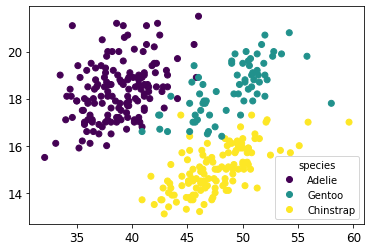

In [43]:
X = clean_set['bill_length_mm']
X1 = clean_set['bill_depth_mm']

scatter = plt.scatter(X, X1, c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=peng_names, title='species')

plt.show()

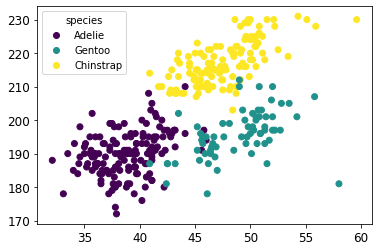

In [44]:
X = clean_set['bill_length_mm']
X1 = clean_set['flipper_length_mm']
scatter = plt.scatter(X, X1, c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=peng_names, title='species')

plt.show()

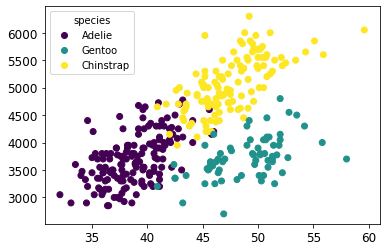

In [45]:
X = clean_set['bill_length_mm']
X1 = clean_set['body_mass_g']
scatter = plt.scatter(X, X1, c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=peng_names, title='species')

plt.show()

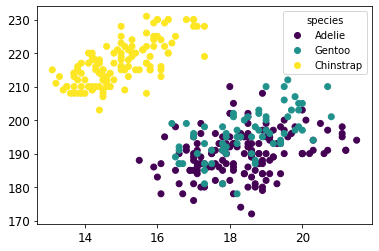

In [46]:
X = clean_set['bill_depth_mm']
X1 = clean_set['flipper_length_mm']
scatter = plt.scatter(X, X1, c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=peng_names, title='species')

plt.show()

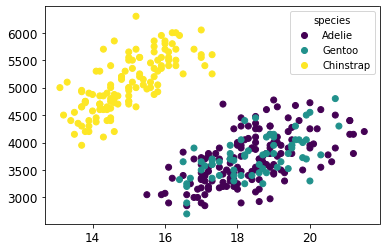

In [47]:
X = clean_set['bill_depth_mm']
X1 = clean_set['body_mass_g']
scatter = plt.scatter(X, X1, c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=peng_names, title='species')

plt.show()

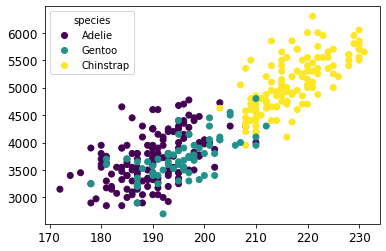

In [48]:
X = clean_set['flipper_length_mm']
X1 = clean_set['body_mass_g']
scatter = plt.scatter(X, X1, c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=peng_names, title='species')

plt.show()

# Linear SVM Classification

In [87]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = clean_set['bill_depth_mm'].values.reshape(-1,1)
y = clean_set['body_mass_g'].values.reshape(-1,1)

# X= X.reshape(-1,1)
# y= y.reshape(-1,1)


X_b = np.c_[np.ones((342, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([[239.28727518]])

In [88]:
y_predict = X.dot(theta_best)
y_predict.reshape(1,-1)

array([[4474.67204583, 4163.5985881 , 4307.17095321, 4618.24441094,
        4929.31786867, 4259.31349817, 4690.03059349, 4331.09968072,
        4833.6029586 , 4091.81240554, 4139.66986058, 4211.45604313,
        5072.89023378, 5048.96150626, 4259.31349817, 4546.45822838,
        4953.24659619, 4402.88586328, 5144.67641633, 4378.95713576,
        4474.67204583, 4594.31568342, 4331.09968072, 4115.74113306,
        4522.52950087, 4450.74331831, 4283.24222569, 4450.74331831,
        4522.52950087, 3996.09749547, 4331.09968072, 4259.31349817,
        4522.52950087, 4067.88367803, 5048.96150626, 4785.74550356,
        4426.81459079, 4618.24441094, 4570.3869559 , 4307.17095321,
        4402.88586328, 4426.81459079, 4713.95932101, 4043.95495051,
        4498.60077335, 4546.45822838, 4522.52950087, 4283.24222569,
        5072.89023378, 4235.38477065, 4522.52950087, 4283.24222569,
        4666.10186597, 4331.09968072, 4450.74331831, 4187.52731562,
        4498.60077335, 3972.16876796, 4570.38695

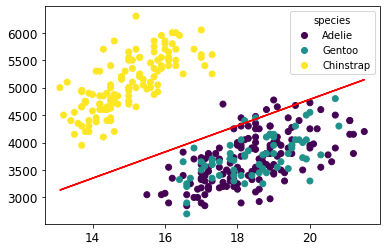

In [89]:
plt.plot(X, y_predict, "r-")
# plt.axis([-2, 2, 0, 10])
scatter = plt.scatter(X, X1, c=c)
plt.legend(handles=scatter.legend_elements()[0], labels=peng_names, title='species')
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
plt.show()